In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\18494\Box\445\final_project\archive\ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Peers Basic Information

Someone is very interested in understanding the causes of obesity and whether they are related to lifestyle habits, food, drink, housing, and transportation.

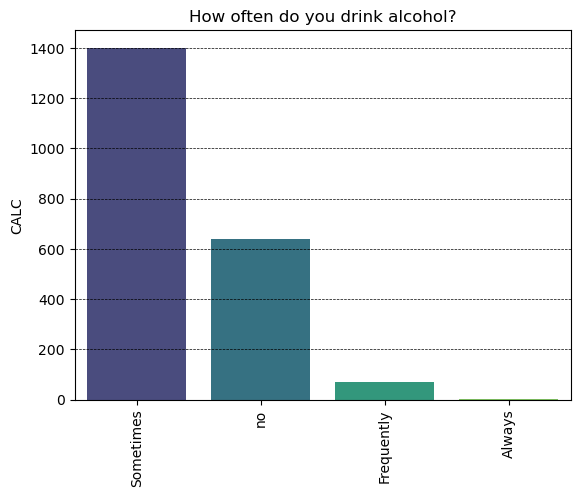

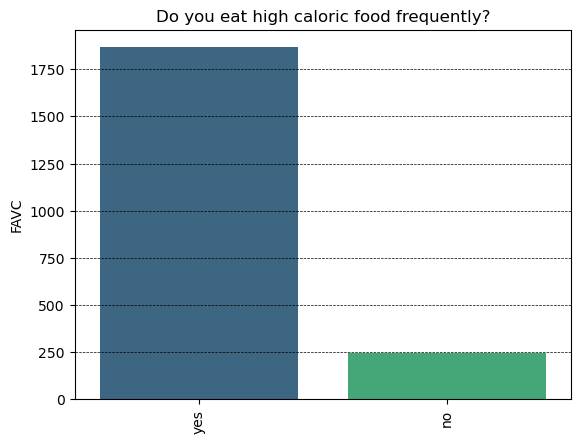

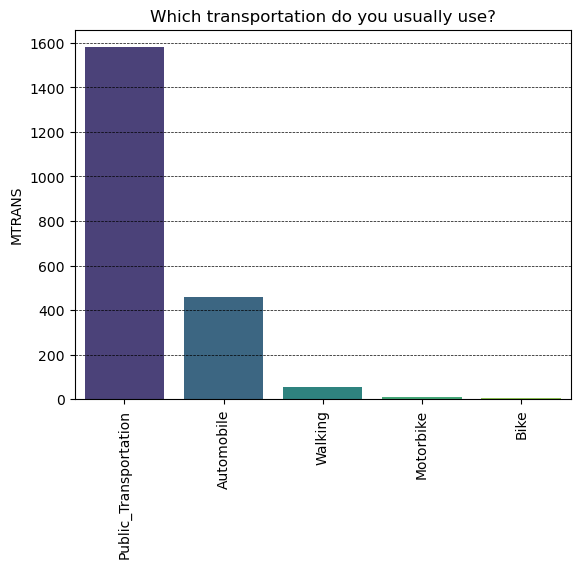

In [11]:
titles = ['How often do you drink alcohol?', 'Do you eat high caloric food frequently?', 'Which transportation do you usually use?']
count = 0
for column in ['CALC','FAVC', 'MTRANS']: 
    values = df[column].value_counts().iloc[:10]
    sns.barplot( x= values.index, y = values, palette='viridis')
    plt.xticks(rotation = 90)
    plt.grid(color='black', linestyle='--', linewidth=0.5, which ='both', axis='y')
    plt.title(titles[count])
    count += 1
    plt.show()

The first chart shows that most of participants are drinking alcoho "sometimes", and the second most are non-drinkers. 
The second chart illustrates, most people like high-caloric food,and a much smaller of them report "no".
The third charts show me most people frequently use model of transportation, followed by Automobile.

## Interaction Effect of Smoking and Alcohol Consumption on Weight

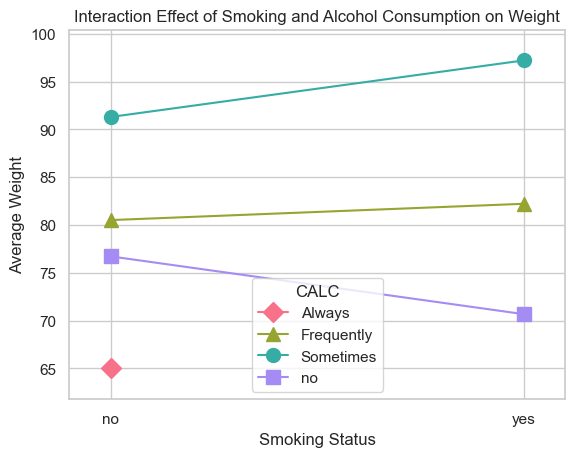

In [19]:
from statsmodels.graphics.factorplots import interaction_plot

df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df = df.dropna(subset=['SMOKE', 'CALC', 'Weight'])

calc_levels = df['CALC'].unique()
colors = sns.color_palette("husl", len(calc_levels))
markers = ['D', '^', 'o', 's', '*', '+', 'x', '1', '2', '3', '4'][:len(calc_levels)]

fig = interaction_plot(df['SMOKE'], df['CALC'], df['Weight'],
                       colors=colors, markers=markers, ms=10)

plt.title('Interaction Effect of Smoking and Alcohol Consumption on Weight')
plt.xlabel('Smoking Status')
plt.ylabel('Average Weight')
plt.show()

## Obesity Level of people that eats high caloric food

We in the previous survey ‘Do you eat high caloric food frequently?’ this question, got the vast majority of people choose ‘yes’, so peer would like to know in further detail, whether the obese people in the So peer would like to know more about whether the ‘FAVC’ indicator is higher in obese people?

Text(0.5, 1.0, 'Obesity Level of people that eats high caloric food')

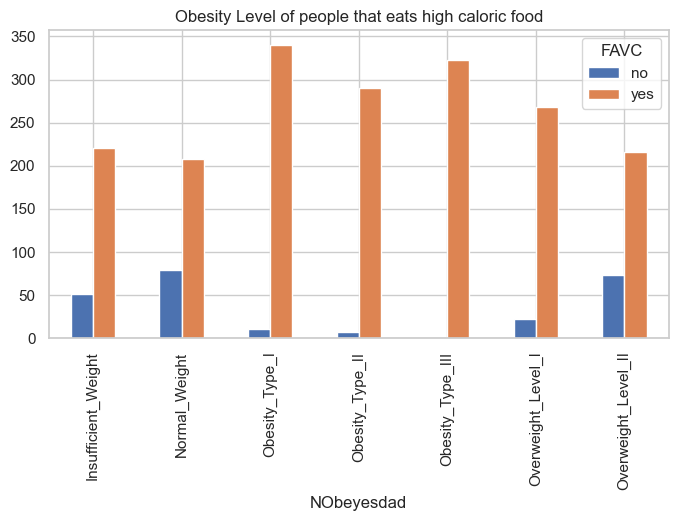

In [25]:
ob_caloric = df.groupby('NObeyesdad')['FAVC'].value_counts().unstack()

ob_caloric.plot(kind='bar', figsize=(8, 4))
plt.title('Obesity Level of people that eats high caloric food')

We can clearly see that obese people do have high FAVCs, and almost every one of them is a ‘yes’.